#Dataset Generation

This notebook contains the code to generate a datatset using the patterns in folder structure.

If the notebook is being run on the local system, please download the necessary files from the drive link provided in the code cells.</br>
<font color="blue">*Please change the links accordingly*</font>




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from collections import Counter 
import random

#Data for Point 1


The folder structure must be:</br>
path -> Sample000</br>
        ->img000-001.png</BR>
        ->img000-002.png</BR>
        .....</BR>
     -> Sample001</br>
        ->img001-001.png</BR>
        ->img001-002.png</BR>
        .....</BR>
     .....</br>
     .....</br>
     -> Sample062</br>


The folder name, for example Sample042 will be used to detect the label 42.

Please modify 


In [ ]:
# Point 1's data is accessed via the zip file stored in the drive
# This zip file is transferred to the disk of the google colab, 
# because accessing it from the disk directly is faster than
# accessing the images from the drive

# Link to the zip file: https://drive.google.com/file/d/1g4dHphWLCX1PisdXacrfw8kdn7MGoxv5/view?usp=sharing
!cp -r "/content/drive/MyDrive/MIDAS/Point1/train.zip" "/content/train.zip" 
!unzip train.zip

In [9]:
path = "path_to/MIDAS/Notebooks/train"

In [10]:
df = pd.DataFrame(columns=['FilePath', 'Label'])
i = 0
for (root,dirs,files) in os.walk(path, topdown=True):
    if i == 0:
      i = 1
      continue

    #print(root)
    files_path = [root + '/' + i for i in files] #Appropriate path of root to be added before the image filepath
    label = [int(root[-2:]) - 1] * len(files_path) #Sample042 -> 42

    x = pd.DataFrame(list(zip(files_path, label)), columns=['FilePath', 'Label'])
    df = df.append(x)

df.head()

,FilePath,Label
0,path_to/MIDAS/Notebooks/train/img051-044.png,50
1,path_to/MIDAS/Notebooks/train/img051-050.png,50
2,path_to/MIDAS/Notebooks/train/img051-051.png,50
3,path_to/MIDAS/Notebooks/train/img051-045.png,50
4,path_to/MIDAS/Notebooks/train/img051-053.png,50


In [ ]:
df['Label'].value_counts()

31    50
60    48
56    42
22    40
17    40
      ..
36    40
35    40
34    40
33    40
1     40
Name: Label, Length: 62, dtype: int64

In [ ]:
df.shape

(2500, 2)

In [ ]:
df.to_csv("path_to/MIDAS/Notebooks/Point1/pointOne_cpath.csv", index=None) 

In [ ]:
df = pd.read_csv("path_to/MIDAS/Notebooks/Point1/pointOne_cpath.csv")
df.head()

,FilePath,Label
0,/content/train/Sample061/img061-047.png,60
1,/content/train/Sample061/img061-008.png,60
2,/content/train/Sample061/img061-050.png,60
3,/content/train/Sample061/img061-014.png,60
4,/content/train/Sample061/img061-004.png,60


In [ ]:
#df['Label'] = df['Label'] - 1
df.shape

(2500, 2)

In [ ]:
df.tail()

,FilePath,Label
35,/content/train/Sample012/img012-013.png,11
36,/content/train/Sample012/img012-025.png,11
37,/content/train/Sample012/img012-026.png,11
38,/content/train/Sample012/img012-001.png,11
39,/content/train/Sample012/img012-011.png,11


In [ ]:
fp = list(df['FilePath'])
print(len(fp))
count = 0
for i in fp:
  if '(1)' in i:
    print(i)
    count = count + 1
    print(count)


In [ ]:
df = df[~df['FilePath'].str.contains('\(1\)')]
df.shape

(2480, 2)

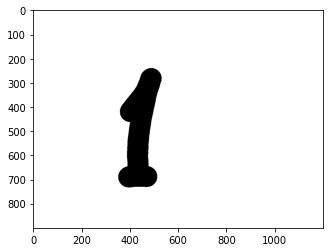

In [ ]:
import matplotlib.pyplot as plt

image1 = cv.imread('path_to/MIDAS/Notebooks/train/Sample002/img002-001.png', cv.IMREAD_GRAYSCALE)
plt.imshow(image1, cmap="gray")

#Point 2

The folders taken into consideration must be 001 to 009

In [ ]:
sum = 0
for (root,dirs,files) in os.walk(path, topdown=True):
  for i in lt:
    if i in root:
      print(root)
    #print(len(files))
      sum += len(files)

print(sum)

In [12]:
df = pd.DataFrame(columns=['FilePath', 'Label'])
lt = ['000', '001', '002', '003', '004', '005', '006', '007', '008', '009']

check = 0
for (root,dirs,files) in os.walk(path, topdown=True):
    if check == 0:
      check = 1
      continue

    for i in lt:
      if i in root:
        print(root)
        files_path = [path + '/' + i for i in files]
        label = [int(root[-2:])] * len(files_path)

        x = pd.DataFrame(list(zip(files_path, label)), columns=['FilePath', 'Label'])
        df = df.append(x)

df.head()

/Users/saloniparekh/Documents/Career/Data Science/MIDAS/Notebooks/train/Sample002
/Users/saloniparekh/Documents/Career/Data Science/MIDAS/Notebooks/train/Sample005
/Users/saloniparekh/Documents/Career/Data Science/MIDAS/Notebooks/train/Sample004
/Users/saloniparekh/Documents/Career/Data Science/MIDAS/Notebooks/train/Sample003
/Users/saloniparekh/Documents/Career/Data Science/MIDAS/Notebooks/train/Sample008
/Users/saloniparekh/Documents/Career/Data Science/MIDAS/Notebooks/train/Sample006
/Users/saloniparekh/Documents/Career/Data Science/MIDAS/Notebooks/train/Sample001
/Users/saloniparekh/Documents/Career/Data Science/MIDAS/Notebooks/train/Sample007
/Users/saloniparekh/Documents/Career/Data Science/MIDAS/Notebooks/train/Sample009


,FilePath,Label
0,/Users/saloniparekh/Documents/Career/Data Scie...,2
1,/Users/saloniparekh/Documents/Career/Data Scie...,2
2,/Users/saloniparekh/Documents/Career/Data Scie...,2
3,/Users/saloniparekh/Documents/Career/Data Scie...,2
4,/Users/saloniparekh/Documents/Career/Data Scie...,2


In [ ]:
df.shape

(360, 2)

In [ ]:
df.to_csv("path_to/MIDAS/Notebooks/Point2/one_to_ten.csv", index=None)

#Point 3

#Data for Point 1


The folder structure must be:</br>
path -> 0</br>
     -> 1</br>
     .....</br>
     .....</br>
     -> 9</br>



In [ ]:
#Link for mnistTask.zip: https://drive.google.com/file/d/1bWjl661Kk3xa8MmdXKHAwsr48080LaQG/view?usp=sharing
!cp -r "/content/drive/MyDrive/MIDAS/Point3/mnistTask.zip" "/content/mnistTask.zip"
!unzip mnistTask.zip

In [ ]:
path = "path_to/MIDAS/Notebooks/mnistTask" #Path to unzipped folder with images
sum = 0

for (root,dirs,files) in os.walk(path, topdown=True):
    print(root)
    print(len(files))
    #print(len(files))
    sum += len(files)

print(sum)

/content/mnistTask
0
/content/mnistTask/7
5954
/content/mnistTask/4
5914
/content/mnistTask/8
6129
/content/mnistTask/2
6009
/content/mnistTask/0
5980
/content/mnistTask/1
5807
/content/mnistTask/5
6139
/content/mnistTask/3
6037
/content/mnistTask/9
5994
/content/mnistTask/6
6037
60000


In [ ]:
root[-1:]

'6'

In [13]:
path = "path_to/MIDAS/Notebooks/mnistTask"
df = pd.DataFrame(columns=['FilePath', 'Label'])
i = 0
for (root,dirs,files) in os.walk(path, topdown=True):
    if i == 0:
      i = 1
      continue

    #print(root)
    files_path = [root + '/' + i for i in files] #Add appropriate file path before image filepath
    label = [int(root[-1:])] * len(files_path) 

    x = pd.DataFrame(list(zip(files_path, label)), columns=['FilePath', 'Label'])
    df = df.append(x)

df.head()

,FilePath,Label
0,/Users/saloniparekh/Documents/Career/Data Scie...,9
1,/Users/saloniparekh/Documents/Career/Data Scie...,9
2,/Users/saloniparekh/Documents/Career/Data Scie...,9
3,/Users/saloniparekh/Documents/Career/Data Scie...,9
4,/Users/saloniparekh/Documents/Career/Data Scie...,9


In [15]:
df.iloc[0, 0]

'/Users/saloniparekh/Documents/Career/Data Science/MIDAS/Notebooks/mnistTask/9/image_051429.jpg'

In [ ]:
df.shape

(60000, 2)

In [ ]:
df['Label'].value_counts()

5    6139
8    6129
6    6037
3    6037
2    6009
9    5994
0    5980
7    5954
4    5914
1    5807
Name: Label, dtype: int64

In [ ]:
df.to_csv('path_to/MIDAS/Notebooks/Point3/dataset_p3.csv', index=None)